In [123]:
import re
import ast
import pandas as pd
import numpy as np
import time
from datetime import datetime

gameplay = pd.DataFrame()

clean = open('bronze_raw.txt').read().replace('\n', '')
champs = clean.split("|")

#Parse data 
for champ in champs[0:-1]:
    
    df = pd.DataFrame()
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df3 = pd.DataFrame()
    
    temp_champ = champ
    graphs = re.findall ( 'data:(.*?)lines:', temp_champ, re.MULTILINE)

    name = temp_champ.split('^')[0]
    #print(name)
    dt = datetime.strptime(temp_champ.split('^')[4], 
                                        '                %b %Y            ')
    release = time.mktime(dt.timetuple())

    s = graphs[0]
    data_pop = ast.literal_eval(s[1:-25])

    data = np.array(data_pop)
    df1['date'] = data[:,0]/1000
    df1['popularity'] = data[:,1]

    s = graphs[1]
    data_wr = ast.literal_eval(s[1:-25])
    data2 = np.array(data_wr)
    df2['date'] = data2[:,0]/1000
    df2['winrate'] = data2[:,1]

    s = graphs[2]
    data_br = ast.literal_eval(s[1:-25])
    data3 = np.array(data_br)
    df3['date'] = data3[:,0]/1000
    df3['banrate'] = data3[:,1]

    df = pd.merge(pd.merge(df1, df2, on='date'), df3, on='date', how='outer')
    df['name'] = name
    df['release'] = release
    gameplay = pd.concat([gameplay, df], axis=0)
    
gameplay.reset_index(drop=True)

,date,popularity,winrate,banrate,name,release
0,1.394525e+09,4.17,50.20,0.34,aatrox,1.370045e+09
1,1.395140e+09,4.09,50.41,0.29,aatrox,1.370045e+09
2,1.395767e+09,4.36,50.25,0.34,aatrox,1.370045e+09
3,1.396411e+09,4.68,49.99,0.39,aatrox,1.370045e+09
4,1.397171e+09,4.05,50.47,0.36,aatrox,1.370045e+09
5,1.397808e+09,11.00,49.08,0.60,aatrox,1.370045e+09
6,1.398488e+09,3.86,50.02,0.37,aatrox,1.370045e+09
7,1.399322e+09,4.26,49.64,0.28,aatrox,1.370045e+09
8,1.399928e+09,3.54,50.16,0.24,aatrox,1.370045e+09
9,1.400560e+09,3.30,49.83,0.54,aatrox,1.370045e+09


In [124]:
gameplay

,date,popularity,winrate,banrate,name,release
0,1.394525e+09,4.17,50.20,0.34,aatrox,1.370045e+09
1,1.395140e+09,4.09,50.41,0.29,aatrox,1.370045e+09
2,1.395767e+09,4.36,50.25,0.34,aatrox,1.370045e+09
3,1.396411e+09,4.68,49.99,0.39,aatrox,1.370045e+09
4,1.397171e+09,4.05,50.47,0.36,aatrox,1.370045e+09
5,1.397808e+09,11.00,49.08,0.60,aatrox,1.370045e+09
6,1.398488e+09,3.86,50.02,0.37,aatrox,1.370045e+09
7,1.399322e+09,4.26,49.64,0.28,aatrox,1.370045e+09
8,1.399928e+09,3.54,50.16,0.24,aatrox,1.370045e+09
9,1.400560e+09,3.30,49.83,0.54,aatrox,1.370045e+09


In [109]:
# dt = datetime.fromtimestamp(gameplay['release'].iloc[0])
dt = datetime.fromtimestamp(gameplay['date'].iloc[0])
print(dt.ctime())
dt = datetime.fromtimestamp(gameplay['date'].iloc[1])
print(dt.ctime())

Tue Mar 11 08:08:51 2014
Tue Mar 18 11:00:01 2014


In [117]:
gameplay.iloc[1000]

date          1.40381e+09
popularity           9.16
winrate             51.29
banrate              0.09
name                 ashe
release       1.23345e+09
Name: 14, dtype: object

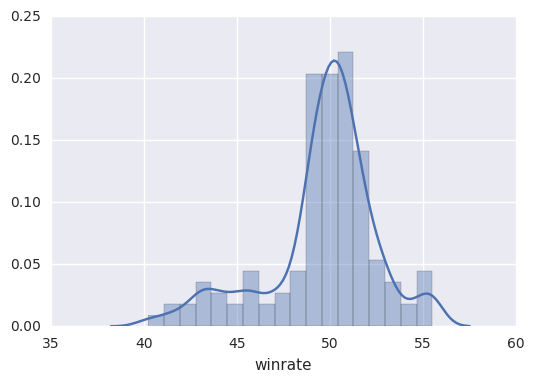

In [35]:
import seaborn as sb
%matplotlib inline

sb.distplot(df['winrate'])

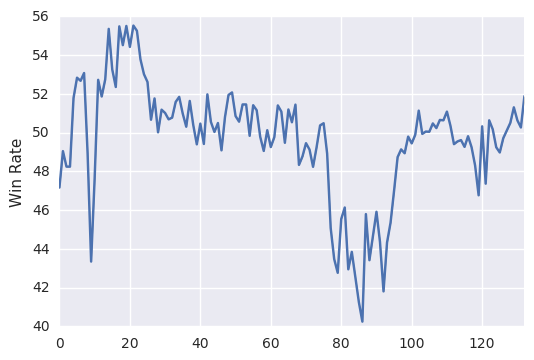

In [38]:
sb.tsplot(df['winrate'], value="Win Rate",)